# <a id='toc1_'></a>[Data Modeling](#toc0_)

Name  
Topic  
email  
June 4th, 2023  


**Table of contents**<a id='toc0_'></a>    
- [Data Modeling](#toc1_)    
- [Setup](#toc2_)    
- [Model 1: Preparation, Initiation, and Evaluation](#toc3_)    
  - [Model 1: Hypothesis Formation](#toc3_1_)    
  - [Model 1: Assumptions](#toc3_2_)    
  - [Model 1: Initiation](#toc3_3_)    
  - [Model 1: Iteration](#toc3_4_)    
  - [Model 1: Evaluation](#toc3_5_)    
  - [Model 1: Efficiency Evaluation](#toc3_6_)    
  - [Model 1: Assessing Residuals](#toc3_7_)    
- [Key Findings](#toc4_)    
- [Recommendations](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Setup](#toc0_)

In [2]:
# Import all functions and classes from the module named 'my_code'
from custom_functions_and_libraries import *

# Set the random.seed(42)
np.random.seed(42)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# # import warnings
# warnings.filterwarnings('ignore')

Versions used in this notebook:
Python version: 3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]
Pandas version: 2.0.2
Numpy version: 1.23.4
Seaborn version: 0.12.2
Matplotlib version: 3.6.2
Scipy version: 1.10.1
Statsmodels version: 0.13.5
SKLearn version: 1.2.2



# <a id='toc3_'></a>[Model Search](#toc0_)

In this section, we will apply some machine learning models on the data.


## <a id='toc3_1_'></a>[Models: Hypothesis Formation and Assumptions](#toc0_)



## <a id='toc3_3_'></a>[Model Search: Grid Initiation](#toc0_)



Here I created my X train and X test sets and y train and y test sets. 

Practice Classification Models:

In [3]:
# # Import the function to load the digits dataset from sklearn.datasets
# from sklearn.datasets import load_digits

# # Load the digits dataset into a variable called digits
# digits = load_digits()

# # Convert the digits dataset into a pandas DataFrame. The data is contained in digits.data and the column names in digits.feature_names
# df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

# # Add a new column to the DataFrame for the target variable. The target values are contained in digits.target
# df['target'] = digits.target

# # Split the digits dataset into a training set and a testing set
# # The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
# train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['target'])

# # Create the feature matrix for the training set (X_train) by dropping the target column from train_df
# # .copy() is used to ensure that changes made to X_train do not affect train_df
# X_train = train_df.drop(columns=['target']).copy()

# # Create the target vector for the training set (y_train) which is just the 'target' column from train_df
# y_train = train_df['target'].copy()

# # Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
# X_test = test_df.drop(columns=['pixel_0_0']).copy()
# y_test = test_df['target'].copy()

# X_train.shape, y_train.shape, X_test.shape, y_test.shape


Practice Regression Models:

In [4]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()

# Convert the dataset into a DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df.info()

# Add the target variable to the DataFrame
df['MedHouseVal'] = california.target

# Split the dataset into a training set and a testing set
# The testing set is 30% of the total dataset, and the split is deterministic (i.e., always the same) because we set a random_state
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Create the feature matrix for the training set (X_train) by dropping the target column from train_df
# .copy() is used to ensure that changes made to X_train do not affect train_df
X_train = train_df.drop(columns=['MedHouseVal']).copy()

# Create the target vector for the training set (y_train) which is just the 'MedHouseVal' column from train_df
y_train = train_df['MedHouseVal'].copy()

# Similarly, create the feature matrix for the testing set (X_test) and the target vector for the testing set (y_test)
X_test = test_df.drop(columns=['MedHouseVal']).copy()
y_test = test_df['MedHouseVal'].copy()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Create a pipeline for each type of problem.

In [44]:
# advanced_regressor_param_grids[0]

In [8]:
# (Optional) Directory for caching transformers
# cachedir = mkdtemp()

# Define the pipeline steps where each step is a tuple of (name, transform)
# Here, 'None' means that the steps are just placeholders and will be defined in the parameter grid
estimators = [('scaler', StandardScaler()),
            ('feature_selection', None),
            ('dim_reducer', None),
            ('model', None)]

# Create the pipeline object
pipe = Pipeline(estimators) #, memory=cachedir


# Regression_models
basic_regression_models = [LinearRegression(), SGDRegressor(), ElasticNet(), DecisionTreeRegressor(), KNeighborsRegressor()] #SVR(kernel='rbf', gamma='auto'),
advanced_regression_models = [RandomForestRegressor(), ExtraTreesRegressor(), LGBMRegressor(), CatBoostRegressor(), GradientBoostingRegressor()]
all_regressor_models = basic_regression_models + advanced_regression_models


# Classifier_models
basic_classifier_models = [LogisticRegression(), SGDClassifier(), DecisionTreeClassifier(), SVC(gamma='auto'), KNeighborsClassifier()]
advanced_classifier_models = [RandomForestClassifier(), ExtraTreesClassifier(), LGBMClassifier(), CatBoostClassifier(), GaussianNB()]
all_classifier_models = basic_classifier_models + advanced_classifier_models

# Clustering_models
clustering_models = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(eps=0.5), GaussianMixture(n_components=3)]

# # Time_series_models
# time_series_models = [
#     ARIMA(order=(1, 1, 1)),  # You'll need to determine the appropriate order parameters based on your data
#     SARIMAX(order=(1, 1, 1), seasonal_order=(1, 1, 1, 1)),  # The order and seasonal_order parameters will need to be determined based on your data
#     Prophet(), # Prophet requires a DataFrame with two columns ("ds" and "y"), where "ds" contains the timestamps and "y" contains the values.
#     Sequential().add(LSTM(50))  # LSTM, being a neural network, requires the input to be reshaped to the form [samples, time steps, features]
# ]

In [9]:
# index = 3

# param_model_list = [basic_classifier_models, basic_regression_models, advanced_classifier_models, advanced_regression_models, clustering_models]


# Define the parameter grid for the Grid Search
# Here, the grid consists of Standard Scaler for the 'scaler' step and all basic classification models for the 'model' step
param_grid = [{'scaler': [StandardScaler()],
            'model': advanced_regression_models}]


## <a id='toc3_4_'></a>[Model Search: Fit HalfGrid](#toc0_)



Here I conducted the grid search. To keep track of the time it takes to run each model search, I created a function to time the model's run time. I also created a dataframe to store the results of each model search.

In [10]:
# Capture the current time to measure the time taken by the grid search
start_time = time.time()

# Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
grid = HalvingRandomSearchCV(pipe, param_grid, return_train_score=True, 
                    cv=3, refit=True, verbose=1, n_jobs=-1, scoring='r2')

# Fit the GridSearchCV object to the data - this will perform the actual grid search
grid.fit(X_train, y_train)

# Calculate the total time taken for the grid search by subtracting the start time from the end time
end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken for grid search: {time_taken} seconds")


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 8
min_resources_: 6
max_resources_: 14448
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 5
n_resources: 6
Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=2408. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 2
n_resources: 18
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken for grid search: 5.476301431655884 seconds


In [11]:
# Create a DataFrame with the results of the grid search
grid_outcomes = pd.DataFrame(grid.cv_results_).apply(lambda x: x.astype(str) if x.dtype == 'object' else x)
display(grid_outcomes)

# Get the best grid search's best predicted probabilities
best_model = grid.best_estimator_

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_model,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,6,0.162398,0.020415,0.010189,4.809420e-04,StandardScaler(),RandomForestRegressor(),"{'scaler': StandardScaler(), 'model': RandomForestRegressor()}",0.420880,-24.027405,0.484747,-7.707259,11.540115,5,8.204682e-01,0.810912,7.952441e-01,8.088748e-01,1.039795e-02
1,0,6,0.116453,0.014249,0.017352,5.522930e-03,StandardScaler(),ExtraTreesRegressor(),"{'scaler': StandardScaler(), 'model': ExtraTreesRegressor()}",0.846124,-21.456223,0.828297,-6.593934,10.509228,4,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,0.000000e+00
2,0,6,0.005836,0.000233,0.002011,4.187001e-04,StandardScaler(),LGBMRegressor(),"{'scaler': StandardScaler(), 'model': LGBMRegressor()}",-0.008471,-24.974818,-0.002174,-8.328487,11.770733,7,-6.661338e-16,0.000000,-6.661338e-16,-4.440892e-16,3.140185e-16
3,0,6,0.456221,0.020877,0.003001,5.150430e-07,StandardScaler(),<catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>,"{'scaler': StandardScaler(), 'model': <catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>}",0.500336,-19.572851,0.700077,-6.124146,9.510020,3,9.998152e-01,0.999825,9.998091e-01,9.998165e-01,6.642884e-06
4,0,6,0.046414,0.003723,0.001667,9.434151e-04,StandardScaler(),GradientBoostingRegressor(),"{'scaler': StandardScaler(), 'model': GradientBoostingRegressor()}",0.819195,-26.680629,0.924312,-8.312374,12.988389,6,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.110223e-16
5,1,18,0.077434,0.001634,0.008352,2.472055e-04,StandardScaler(),ExtraTreesRegressor(),"{'scaler': StandardScaler(), 'model': ExtraTreesRegressor()}",-0.800461,0.013251,-0.331143,-0.372784,0.333499,1,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,0.000000e+00
6,1,18,0.644434,0.004092,0.003001,3.371748e-07,StandardScaler(),<catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>,"{'scaler': StandardScaler(), 'model': <catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>}",-1.281364,-0.203952,-0.149039,-0.544785,0.521322,2,9.999652e-01,0.999981,9.999808e-01,9.999757e-01,7.410114e-06


In [12]:
# Sort the DataFrame based on the mean test score and select the top 3
top3 = grid_outcomes.sort_values('rank_test_score').head(3)

# Pivot the DataFrame so the models are the columns and the parameters/scores are the rows
top3 = top3.set_index('rank_test_score')

# Display the DataFrame
display(top3)


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_model,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
rank_test_score,,,,,,,,,,,,,,,,,,,
1,1,18,0.077434,0.001634,0.008352,2.472055e-04,StandardScaler(),ExtraTreesRegressor(),"{'scaler': StandardScaler(), 'model': ExtraTreesRegressor()}",-0.800461,0.013251,-0.331143,-0.372784,0.333499,1.000000,1.000000,1.000000,1.000000,0.000000
2,1,18,0.644434,0.004092,0.003001,3.371748e-07,StandardScaler(),<catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>,"{'scaler': StandardScaler(), 'model': <catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>}",-1.281364,-0.203952,-0.149039,-0.544785,0.521322,0.999965,0.999981,0.999981,0.999976,0.000007
3,0,6,0.456221,0.020877,0.003001,5.150430e-07,StandardScaler(),<catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>,"{'scaler': StandardScaler(), 'model': <catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>}",0.500336,-19.572851,0.700077,-6.124146,9.510020,0.999815,0.999825,0.999809,0.999816,0.000007


In [13]:
# Sort the DataFrame based on the mean test score and select the top 3
top3 = grid_outcomes.sort_values('rank_test_score').head(3)

# Pivot the DataFrame so the models are the columns and the parameters/scores are the rows
top3 = top3.set_index('rank_test_score')

# Filter the columns based on the regex pattern
filtered_columns = top3.filter(regex=r'^param_', axis=1).columns

# Parameters of the best model
results1 = top3.loc[:, filtered_columns].sort_index().to_dict()


# Append the other results to the list
results2 = {
    'score_method': grid.scoring,
    'train_score_average': top3.loc[: , 'mean_train_score'],
    'validation_score_average': top3.loc[:, 'mean_test_score'],
    'n_splits': grid.n_splits_,
    'mean_fit_time': top3.loc[:, 'mean_fit_time'],
    'mean_score_time': top3.loc[:, 'mean_score_time'],

}

results1.update(results2)

# Convert the results to a DataFrame
top_3_model_results = pd.DataFrame(results1)

display(top_3_model_results.T) #.plot(kind='bar', y=['train_score_average', 'validation_score_average', 'test_score_actual'], figsize=(10, 6))

print('test_score_actual', grid.score(X_test, y_test),
        '\nrefit_time', grid.refit_time_,
        '\ntotal_search_time', time_taken)

,1,2,3
param_scaler,StandardScaler(),StandardScaler(),StandardScaler()
param_model,ExtraTreesRegressor(),<catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>,<catboost.core.CatBoostRegressor object at 0x00000197EFFB6820>
score_method,r2,r2,r2
train_score_average,1.0,0.999976,0.999816
validation_score_average,-0.372784,-0.544785,-6.124146
n_splits,3,3,3
mean_fit_time,0.077434,0.644434,0.456221
mean_score_time,0.008352,0.003001,0.003001


test_score_actual 0.8096375828357834 
refit_time 3.165696382522583 
total_search_time 5.476301431655884


## <a id='toc3_5_'></a>[Model Search: Evaluation of all Models](#toc0_)



Here I visualize the impact of shifting the hyperparameters on the accuracy of the model. I also visualize the confusion matrix and printed out the classification report.

In [14]:
print(grid_outcomes.columns)

first_hyperparameter = 'param_model'
second_hyperparameter = 'param_scaler'
pipe_plot_name = 'model'


grid_outcomes.groupby(first_hyperparameter)

Index(['iter', 'n_resources', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_scaler', 'param_model',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


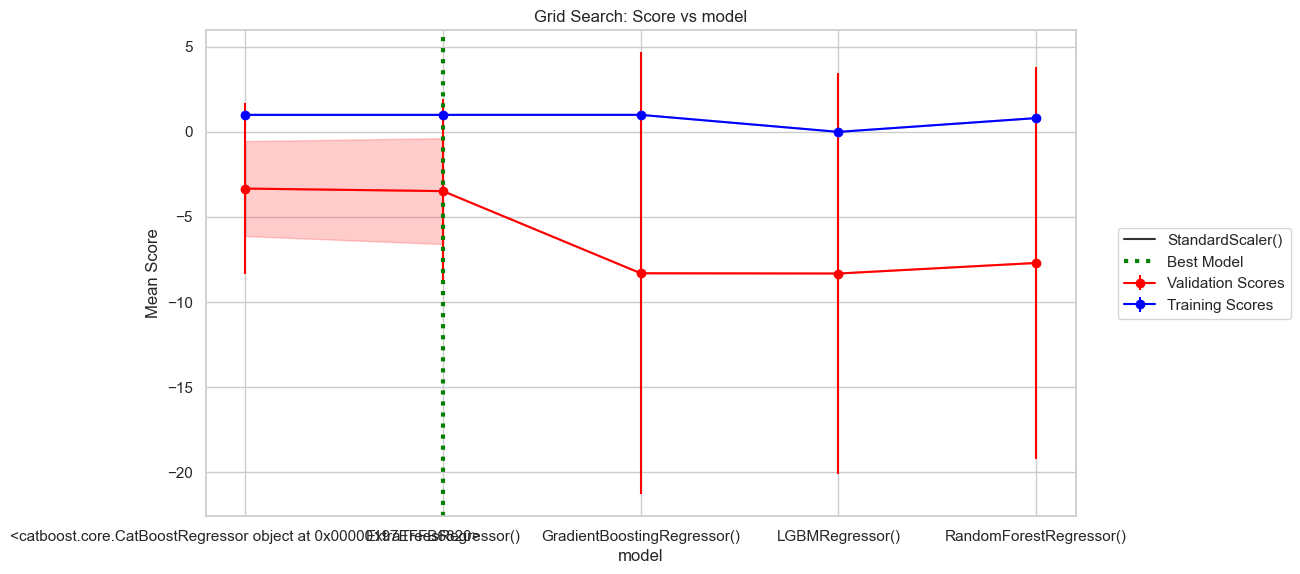

In [15]:
# Call the function with your actual data
plot_average_score_of_hyperparameters(grid_outcomes, first_hyperparameter, 
                variable_plot_name=pipe_plot_name, second_hyperparameter=second_hyperparameter)


In [16]:
# Using the function
evaluate_linear_model(best_model, X_test, y_test, plot=True)


# evaluate_classifier_model(best_model, X_test, y_test, confusion_matrix=True)



,Scores
R^2,0.809638
Adjusted R^2,0.809391
MAE,0.326879
MSE,0.249858
RMSE,0.499858
Explained Variance,0.809749


R^2                   0.809638
Adjusted R^2          0.809391
MAE                   0.326879
MSE                   0.249858
RMSE                  0.499858
Explained Variance    0.809749
dtype: float64

## <a id='toc3_6_'></a>[Model 1: Efficiency Evaluation](#toc0_)




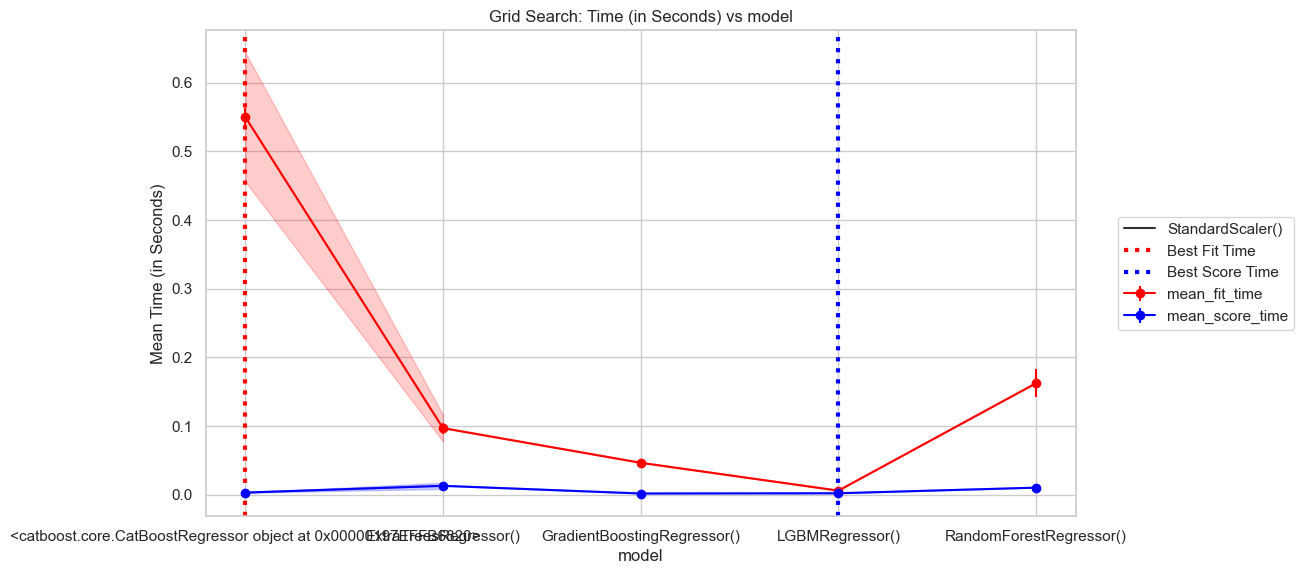

In [17]:
plot_average_time_of_hyperparameters(grid_outcomes, first_hyperparameter, pipe_plot_name, second_hyperparameter=second_hyperparameter)

## <a id='toc3_7_'></a>[Model 1: Assessing Residuals](#toc0_)


**Independence and Identically Distributed Test**

<Figure size 1200x600 with 0 Axes>

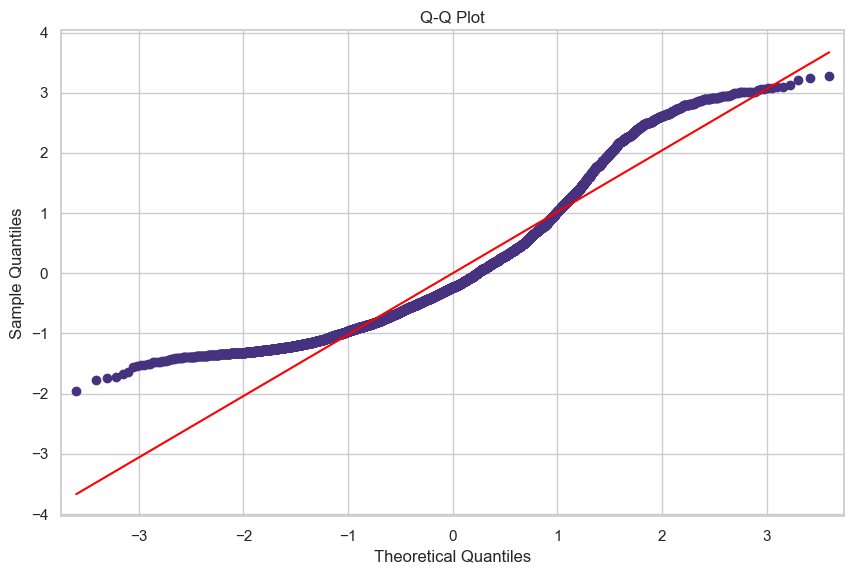

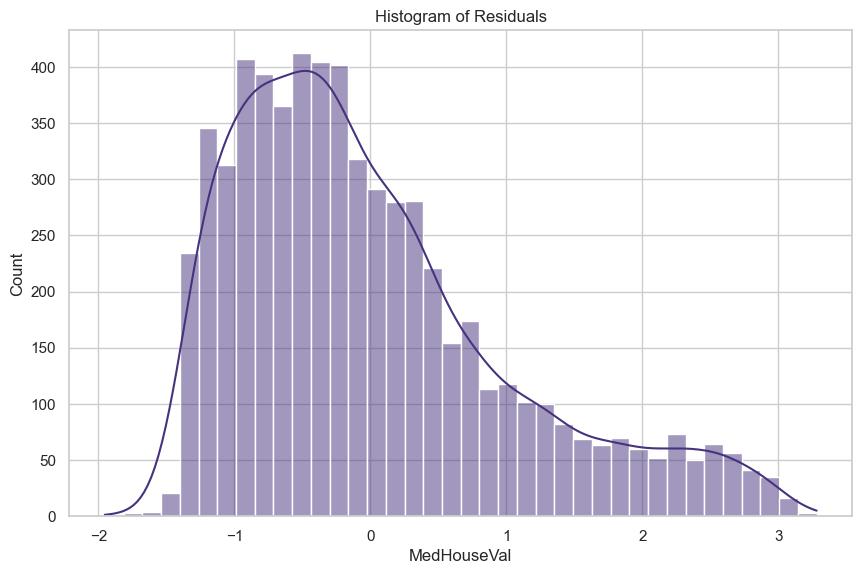

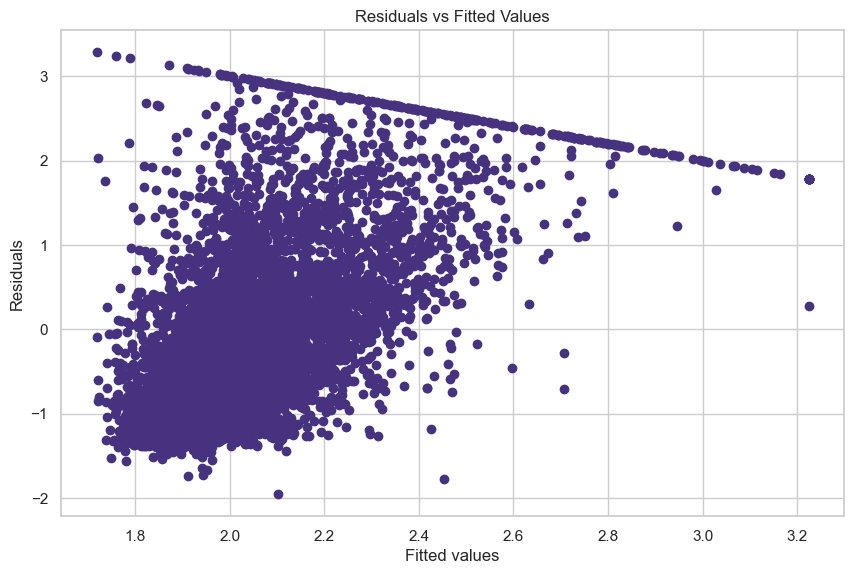

<Figure size 900x600 with 0 Axes>

In [55]:
plot_regression_residuals(best_model, X_test, y_test)

# plot_classifier_residuals(best_model, X_test, y_test, True)

These two visual tests show that the distribution of the residuals is normally distributed and appears to be independent of the fitted values. Furthermore, the Durbin-Watson of the residuals is close to 2, which indicates that there is very little to no autocorrelation in the residuals. Therefore we can conclude that the residuals are not correlated with each other and the distribution of the residuals is not dependent on the predicted probability of the target class. This means that this model meets the assumption of independence and identically distributed. 



## Final Model Tuning

### Final Model Hyperparameter Tuning

In [56]:
param_grid_catboost = {'scaler': [StandardScaler()],
        'model': [CatBoostRegressor()],
        'model__learning_rate': np.logspace(-2, 2, 5),
        'model__iterations': [500, 1000],
        'model__depth': [4, 7, 10]}

param_grid = param_grid_catboost

In [57]:
# Capture the current time to measure the time taken by the grid search
start_time = time.time()

# Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
grid = HalvingGridSearchCV(pipe, param_grid, return_train_score=True, 
                    cv=3, refit=True, verbose=0, n_jobs=-1, scoring='r2')

# Fit the GridSearchCV object to the data - this will perform the actual grid search
grid.fit(X_train, y_train)

# Calculate the total time taken for the grid search by subtracting the start time from the end time
end_time = time.time()
time_taken = end_time - start_time
# print(f"Time taken for grid search: {time_taken} seconds")


In [ ]:
# Create a DataFrame with the results of the grid search
grid_outcomes = pd.DataFrame(grid.cv_results_).apply(lambda x: x.astype(str) if x.dtype == 'object' else x)
display(grid_outcomes.sort_values('rank_test_score').head(3))

# Get the best grid search's best predicted probabilities
best_model = grid.best_estimator_

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__depth,param_model__iterations,param_model__learning_rate,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,1,14448,16.397363,0.379182,0.056859,0.031667,<catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>,8,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>, 'model__depth': 8, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.847623,0.838292,0.853517,0.847891,0.845037,0.846472,0.004938,1,0.941222,0.942760,0.939552,0.941586,0.940193,0.941063,0.001115
6,1,14448,13.955913,0.417455,0.031470,0.010383,<catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>,7,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>, 'model__depth': 7, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.846280,0.836946,0.854096,0.846410,0.842861,0.845319,0.005573,2,0.926736,0.927685,0.924475,0.927595,0.925187,0.926335,0.001292
1,0,4816,11.792748,1.409318,0.050371,0.022531,<catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>,7,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>, 'model__depth': 7, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.852003,0.817491,0.824046,0.816455,0.791938,0.820387,0.019216,3,0.959836,0.962747,0.958174,0.960831,0.960179,0.960353,0.001484
2,0,4816,21.155450,2.444206,0.086606,0.011483,<catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>,8,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>, 'model__depth': 8, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.849195,0.814516,0.823641,0.815363,0.791296,0.818802,0.018622,4,0.971944,0.974480,0.972821,0.972484,0.972334,0.972813,0.000880
0,0,4816,7.904431,0.358833,0.031677,0.005318,<catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>,6,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>, 'model__depth': 6, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.850999,0.817801,0.822646,0.814282,0.787019,0.818549,0.020409,5,0.945110,0.946590,0.943599,0.944549,0.943375,0.944645,0.001159


In [ ]:
# Sort the DataFrame based on the mean test score and select the top 3
top3 = grid_outcomes.sort_values('rank_test_score').head(3)

# Pivot the DataFrame so the models are the columns and the parameters/scores are the rows
top3 = top3.set_index('rank_test_score')

# Filter the columns based on the regex pattern
filtered_columns = top3.filter(regex=r'^param_', axis=1).columns

# Parameters of the best model
results1 = top3.loc[:, filtered_columns].sort_index().to_dict()


# Append the other results to the list
results2 = {
    'score_method': grid.scoring,
    'train_score_average': top3.loc[: , 'mean_train_score'],
    'validation_score_average': top3.loc[:, 'mean_test_score'],
    'n_splits': grid.n_splits_,
    'mean_fit_time': top3.loc[:, 'mean_fit_time'],
    'mean_score_time': top3.loc[:, 'mean_score_time'],

}

results1.update(results2)

# Convert the results to a DataFrame
top_3_model_results = pd.DataFrame(results1)

display(top_3_model_results.T) #.plot(kind='bar', y=['train_score_average', 'validation_score_average', 'test_score_actual'], figsize=(10, 6))

print('test_score_actual', grid.score(X_test, y_test),
        '\nrefit_time', grid.refit_time_,
        '\ntotal_search_time', time_taken)

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__depth,param_model__iterations,param_model__learning_rate,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
rank_test_score,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,14448,16.397363,0.379182,0.056859,0.031667,<catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>,8,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>, 'model__depth': 8, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.847623,0.838292,0.853517,0.847891,0.845037,0.846472,0.004938,0.941222,0.942760,0.939552,0.941586,0.940193,0.941063,0.001115
2,1,14448,13.955913,0.417455,0.031470,0.010383,<catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>,7,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>, 'model__depth': 7, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.846280,0.836946,0.854096,0.846410,0.842861,0.845319,0.005573,0.926736,0.927685,0.924475,0.927595,0.925187,0.926335,0.001292
3,0,4816,11.792748,1.409318,0.050371,0.022531,<catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>,7,1000,0.05,StandardScaler(),"{'model': <catboost.core.CatBoostRegressor object at 0x000001CB4DD230D0>, 'model__depth': 7, 'model__iterations': 1000, 'model__learning_rate': 0.05, 'scaler': StandardScaler()}",0.852003,0.817491,0.824046,0.816455,0.791938,0.820387,0.019216,0.959836,0.962747,0.958174,0.960831,0.960179,0.960353,0.001484


## <a id='toc3_5_'></a>[Final Model Tuning: Evaluation of Hyperparameters](#toc0_)



Here I visualize the impact of shifting the hyperparameters on the accuracy of the model. I also visualize the confusion matrix and printed out the classification report.

In [ ]:
print(grid_outcomes.columns)


Index(['iter', 'n_resources', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'param_model',
       'param_model__depth', 'param_model__iterations',
       'param_model__learning_rate', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')


In [ ]:
first_hyperparameter = 'param_model__depth'
second_hyperparameter = None
pipe_plot_name = 'param_model__depth'


grid_outcomes.groupby(first_hyperparameter)

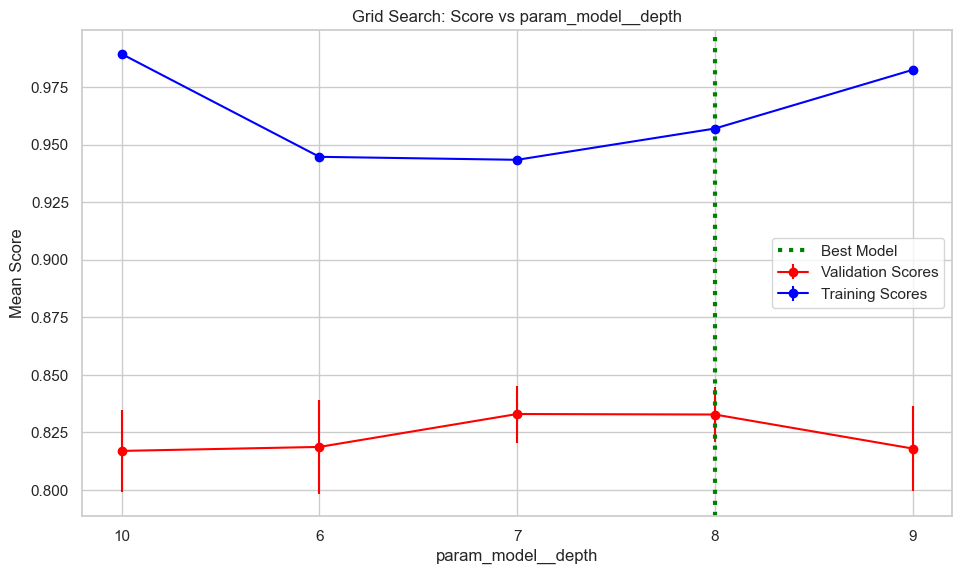

In [ ]:
# Call the function with your actual data
plot_average_score_of_hyperparameters(grid_outcomes, first_hyperparameter, 
                variable_plot_name=pipe_plot_name, second_hyperparameter=second_hyperparameter)


In [ ]:
# Using the function
evaluate_linear_model(best_model, X_test, y_test, plot=True)



,Scores
R^2,0.854100
Adjusted R^2,0.853911
MAE,0.287720
MSE,0.191500
RMSE,0.437607
Explained Variance,0.854107


R^2                   0.854100
Adjusted R^2          0.853911
MAE                   0.287720
MSE                   0.191500
RMSE                  0.437607
Explained Variance    0.854107
dtype: float64

In [ ]:
# evaluate_classifier_model(best_model, X_test, y_test, confusion_matrix=True)



<Figure size 1200x600 with 0 Axes>

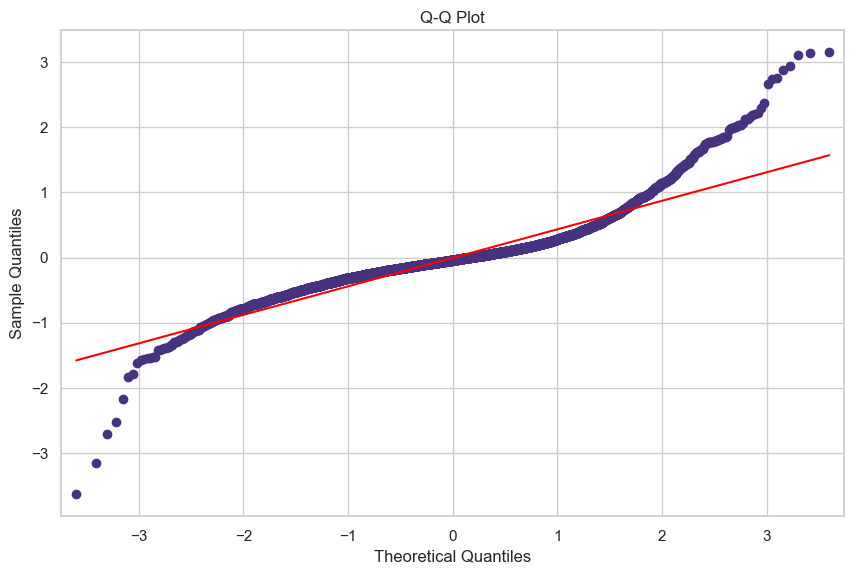

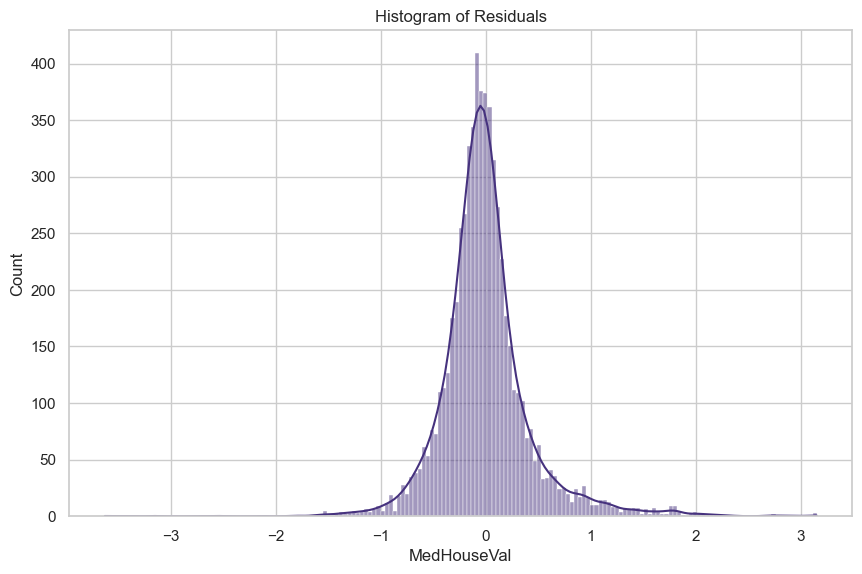

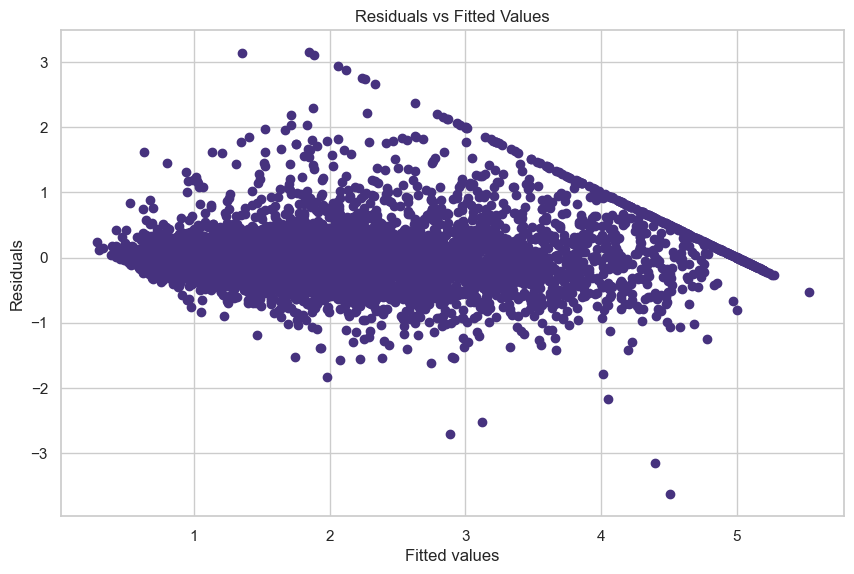

<Figure size 900x600 with 0 Axes>

In [ ]:
plot_regression_residuals(best_model, X_test, y_test)

# <a id='toc4_'></a>[Key Findings](#toc0_)

Summarize the findings from the analyses.



# <a id='toc5_'></a>[Recommendations](#toc0_)

List number of actionables based on the findings.

### Reference for other parameter grids

In [ ]:
# Parameter grid for LinearRegression
param_grid_linreg = {'scaler': [StandardScaler()],
    'model': [LinearRegression()],
    # Linear Regression does not really have any hyperparameters
}

# Parameter grid for SGDRegressor
param_grid_sgdreg = {'scaler': [StandardScaler()],
    'model': [SGDRegressor()],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

# Parameter grid for ElasticNet
param_grid_elasticnet = {'scaler': [StandardScaler()],
    'model': [ElasticNet()],
    'model__alpha': np.logspace(-4, 4, 20),
    'model__l1_ratio': np.linspace(0, 1, 10)
}

# Parameter grid for DecisionTreeRegressor
param_grid_dtr = {'scaler': [StandardScaler()],
    'model': [DecisionTreeRegressor()],
    'model__criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}

# Parameter grid for SVR
param_grid_svr = {'scaler': [StandardScaler()],
    'model': [SVR()],
    'model__C': [0.1, 1, 10, 100],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma': ['scale', 'auto']
}

# Parameter grid for KNeighborsRegressor
param_grid_knr = {'scaler': [StandardScaler()],
    'model': [KNeighborsRegressor()],
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Combine all parameter grids into a list
basic_regression_param_grids = [param_grid_linreg, param_grid_sgdreg, param_grid_elasticnet, param_grid_dtr, param_grid_knr] # param_grid_svr, 


In [ ]:
# Parameter grid for LogisticRegression
param_grid_logreg = {'scaler': [StandardScaler()],
    'model': [LogisticRegression()],
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': np.logspace(-4, 4, 10)
}

# Parameter grid for SGDClassifier
param_grid_sgd = {'scaler': [StandardScaler()],
    'model': [SGDClassifier()],
    'model__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': np.logspace(-4, 4, 10)
}

# Parameter grid for DecisionTreeClassifier
param_grid_dtc = {'scaler': [StandardScaler()],
    'model': [DecisionTreeClassifier()],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 6]
}

# Parameter grid for SVC
param_grid_svc = {'scaler': [StandardScaler()],
    'model': [SVC()],
    'model__C': np.logspace(-2, 2, 5),
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma': ['scale', 'auto']
}

# Parameter grid for KNeighborsClassifier
param_grid_knc = {'scaler': [StandardScaler()],
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Combine all parameter grids into a list
basic_classifier_param_grids = [param_grid_logreg, param_grid_sgd, param_grid_dtc, param_grid_svc, param_grid_knc]


In [ ]:
# Parameter grid for KMeans
param_grid_kmeans = {'scaler': [StandardScaler()],
    'model': [KMeans()],
    'model__n_clusters': range(2, 11, 2),
    'model__init': ['k-means++', 'random'],
    'model__n_init': [10, 20]
}

# Parameter grid for AgglomerativeClustering
param_grid_aggc = {'scaler': [StandardScaler()],
    'model': [AgglomerativeClustering()],
    'model__n_clusters': range(2, 11, 2),
    'model__linkage': ['ward', 'complete', 'average', 'single']
}

# Parameter grid for DBSCAN
param_grid_dbscan = {'scaler': [StandardScaler()],
    'model': [DBSCAN()],
    'model__eps': [0.3, 0.5, 0.7],
    'model__min_samples': [4, 10, 18]
}

# Parameter grid for GaussianMixture
param_grid_gmm = {'scaler': [StandardScaler()],
    'model': [GaussianMixture()],
    'model__init_params': ['kmeans++', 'random'],
    'model__n_components': range(2, 11, 2),
    'model__covariance_type': ['full', 'tied', 'diag', 'spherical']
}

# Combine all parameter grids into a list
clustering_param_grids = [param_grid_kmeans, param_grid_aggc, param_grid_dbscan, param_grid_gmm]


In [ ]:
# Parameter grid for RandomForestClassifier
param_grid_rfc = {'scaler': [StandardScaler()],
    'model': [RandomForestClassifier()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': range(2, 11, 2),
    'model__min_samples_leaf': [1, 2, 4, 8]
}

# Parameter grid for ExtraTreesClassifier
param_grid_etc = {'scaler': [StandardScaler()],
    'model': [ExtraTreesClassifier()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': range(2, 11, 2),
    'model__min_samples_leaf': [1, 2, 4, 8]
}

# Parameter grid for LGBMClassifier
param_grid_lgbmc = {'scaler': [StandardScaler()],
    'model': [LGBMClassifier()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__num_leaves': [31, 60, 90],
    'model__max_depth': [None, 5, 10, 15]
}

# Parameter grid for CatBoostClassifier
param_grid_catboostc = {'scaler': [StandardScaler()],
    'model': [CatBoostClassifier()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__iterations': [500, 1000],
    'model__depth': [5, 7, 10]
}

# Parameter grid for GaussianNB
param_grid_gnb = {
    'model': [GaussianNB()]  # no hyperparameters to tune
}

# Combine all parameter grids into a list
advanced_classifier_param_grids = [param_grid_rfc, param_grid_etc, param_grid_lgbmc, param_grid_catboostc, param_grid_gnb]


In [ ]:
# Parameter grid for RandomForestRegressor
param_grid_rfr = {'scaler': [StandardScaler()],
    'model': [RandomForestRegressor()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Parameter grid for ExtraTreesRegressor
param_grid_etr = {'scaler': [StandardScaler()],
    'model': [ExtraTreesRegressor()],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Parameter grid for LGBMRegressor
param_grid_lgbm = {'scaler': [StandardScaler()],
    'model': [LGBMRegressor()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__num_leaves': [31, 60, 90],
    'model__max_depth': [None, 5, 10, 15]
}

# Parameter grid for CatBoostRegressor
param_grid_catboost = {'scaler': [StandardScaler()],
    'model': [CatBoostRegressor()],
    'model__learning_rate': np.logspace(-2, 2, 5),
    'model__iterations': [500, 1000],
    'model__depth': [4, 7, 10]
}

# Parameter grid for GradientBoostingRegressor
param_grid_gbr = {'scaler': [StandardScaler()],
    'model': [GradientBoostingRegressor()],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__max_depth': [None, 3, 5, 7]
}

# Combine all parameter grids into a list
advanced_regression_param_grids = [param_grid_rfr, param_grid_etr, param_grid_lgbm, param_grid_catboost, param_grid_gbr]


In [ ]:

# Classifier parameter grids
basic_classifier_param_grids
advanced_classifier_param_grids

# Regressor parameter grids
basic_regression_param_grids
advanced_regression_param_grids

# Clustering parameter grids
clustering_param_grids

[{'scaler': [StandardScaler()],
  'model': [KMeans()],
  'model__n_clusters': range(2, 11, 2),
  'model__init': ['k-means++', 'random'],
  'model__n_init': [10, 20]},
 {'scaler': [StandardScaler()],
  'model': [AgglomerativeClustering()],
  'model__n_clusters': range(2, 11, 2),
  'model__linkage': ['ward', 'complete', 'average', 'single']},
 {'scaler': [StandardScaler()],
  'model': [DBSCAN()],
  'model__eps': [0.3, 0.5, 0.7],
  'model__min_samples': [4, 10, 18]},
 {'scaler': [StandardScaler()],
  'model': [GaussianMixture()],
  'model__init_params': ['kmeans++', 'random'],
  'model__n_components': range(2, 11, 2),
  'model__covariance_type': ['full', 'tied', 'diag', 'spherical']}]

In [ ]:
# Suppose the list of parameter grids is as follows
param_grids = basic_regression_param_grids

# Empty DataFrame to store the results
results_df = []

# Iterate over each parameter grid in the list
for i, param_grid in enumerate(param_grids):
    
    # Capture the current time to measure the time taken by the grid search
    start_time = time.time()
    
    # Define a HalvingRandomSearchCV object with the pipeline, parameter grid, and desired settings
    grid = HalvingRandomSearchCV(pipe, param_grid, return_train_score=True, 
                        cv=3, refit=True, verbose=1, n_jobs=-1, scoring='r2')

    # Fit the GridSearchCV object to the data - this will perform the actual grid search
    grid.fit(X_train, y_train)
    
    # Calculate the total time taken for the grid search by subtracting the start time from the end time
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Retrieve the best parameters, best training score, best test score, and mean fit time
    best_params = grid.best_params_
    train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
    test_score = grid.cv_results_['mean_test_score'][grid.best_index_]
    mean_fit_time = grid.cv_results_['mean_fit_time'][grid.best_index_]
    
    # Append the results to the DataFrame
    results_df.append({
        'params': best_params, 
        'train_score': round(train_score, 3), 
        'test_score': round(test_score, 3), 
        'mean_fit_time': mean_fit_time,
        'search_time': time_taken
    })
    
    print("Total Time Taken:", time_taken)


n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 8
min_resources_: 6
max_resources_: 14448
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 6
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Total Time Taken: 0.0253140926361084
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 8
min_resources_: 6
max_resources_: 14448
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 21
n_resources: 6
Fitting 3 folds for each of 21 candidates, totalling 63 fits
----------
iter: 1
n_candidates: 7
n_resources: 18
Fitting 3 folds for each of 7 candidates, totalling 21 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=2408. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 21 is smaller than n_iter=2408. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 2
n_candidates: 3
n_resources: 54
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Total Time Taken: 0.2704660892486572
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 8
min_resources_: 6
max_resources_: 14448
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 200
n_resources: 6
Fitting 3 folds for each of 200 candidates, totalling 600 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 200 is smaller than n_iter=2408. Running 200 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 67
n_resources: 18
Fitting 3 folds for each of 67 candidates, totalling 201 fits
----------
iter: 2
n_candidates: 23
n_resources: 54
Fitting 3 folds for each of 23 candidates, totalling 69 fits
----------
iter: 3
n_candidates: 8
n_resources: 162
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 4
n_candidates: 3
n_resources: 486
Fitting 3 folds for each of 3 candidates, totalling 9 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.459e+03, tolerance: 1.936e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 240 is smaller than n_iter=2408. Running 240 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Total Time Taken: 1.4256062507629395
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 8
min_resources_: 6
max_resources_: 14448
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 240
n_resources: 6
Fitting 3 folds for each of 240 candidates, totalling 720 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\ProgramData\Anaconda3\lib\site-p

----------
iter: 1
n_candidates: 80
n_resources: 18
Fitting 3 folds for each of 80 candidates, totalling 240 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
            

----------
iter: 2
n_candidates: 27
n_resources: 54
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 3
n_candidates: 9
n_resources: 162
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
            

----------
iter: 4
n_candidates: 3
n_resources: 486
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Total Time Taken: 1.7045519351959229
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 8
min_resources_: 6
max_resources_: 14448
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 24
n_resources: 6
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 1
n_candidates: 8
n_resources: 18
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 2
n_candidates: 3
n_resources: 54
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Total Time Taken: 0.41371822357177734


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-11.12560896 -11.87429697          nan          nan          nan
          nan          nan          nan  -4.22147883  -6.21906746
          nan          nan          nan          nan          nan
          nan -11.12560896 -11.87429697          nan          nan
          nan          nan          nan          nan]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [0.30279077 1.                nan        nan        nan        nan
        nan        nan 0.32847873 1.                nan        nan
        nan        nan        nan        nan 0.30279077 1.
        nan        nan        nan        nan        nan        nan]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One 

In [ ]:

# Display the resulting DataFrame
pd.DataFrame(results_df).sort_values(by='test_score', ascending=False)


,params,train_score,test_score,mean_fit_time,search_time
2,"{'scaler': StandardScaler(), 'model__l1_ratio': 0.0, 'model__alpha': 0.23357214690901212, 'model': ElasticNet(alpha=0.23357214690901212, l1_ratio=0.0)}",0.626,0.530,0.004669,1.425606
4,"{'scaler': StandardScaler(), 'model__weights': 'distance', 'model__n_neighbors': 3, 'model__metric': 'minkowski', 'model': KNeighborsRegressor(n_neighbors=3, weights='distance')}",1.000,0.463,0.003350,0.413718
3,"{'scaler': StandardScaler(), 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_depth': 5, 'model__criterion': 'friedman_mse', 'model': DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, min_samples_leaf=2, min_samples_split=10)}",0.757,0.384,0.003681,1.704552
1,"{'scaler': StandardScaler(), 'model__penalty': 'l1', 'model__alpha': 0.01, 'model': SGDRegressor(alpha=0.01, penalty='l1')}",0.619,0.187,0.003114,0.270466
0,"{'scaler': StandardScaler(), 'model': LinearRegression()}",1.000,-7.675,0.005619,0.025314
